In [1]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from zscore_signal import rolling_zscore_signal, rolling_zscore_trading_rule
sys.path.append('../..')
from oil_trading.EquityPerformance import equity_performance

plt.style.use("classic")
%matplotlib inline

path = "https://github.com/queiyanglim/trading_algorithm/blob/master/oil_trading/data/daily.csv?raw=true"
df_pull = pd.read_csv(path, header=[0,1], index_col = 0)

# Prepare data
brent = df_pull.brent.CLOSE
brent.name = "brent"
wti = df_pull.wti.CLOSE
wti.name = "wti"

df_raw= pd.concat([brent, wti], axis = 1)
df = df_raw.copy()
df = df.dropna()

df.head()

,brent,wti
timestamp,,
2014-05-14,110.19,102.37
2014-05-15,110.44,101.50
2014-05-16,109.75,102.02
2014-05-19,109.37,102.61
2014-05-20,109.69,102.33


In [13]:
df_input = df.copy()
df_signal = rolling_zscore_signal(df_input, "wti", "brent", 30)
df_rule = rolling_zscore_trading_rule(df_signal)
df_equity, performance = equity_performance(df_rule,"wti", "brent")
df_equity

,brent,wti,spread,signal,position,X_pos,y_pos,daily_mtm,equity
timestamp,,,,,,,,,
2014-06-25,114.00,106.50,7.50,0.701211,0,0.0,0.0,0.00,100000.00
2014-06-26,113.21,105.84,7.37,0.585426,0,0.0,0.0,0.00,100000.00
2014-06-27,113.30,105.74,7.56,0.906041,0,0.0,0.0,0.00,100000.00
2014-06-30,112.36,105.37,6.99,0.278639,0,0.0,0.0,0.00,100000.00
2014-07-01,112.29,105.34,6.95,0.224875,0,0.0,0.0,0.00,100000.00
...,...,...,...,...,...,...,...,...,...
2020-02-27,52.18,47.09,5.09,-0.343145,0,0.0,0.0,0.00,-585911.59
2020-02-28,50.52,44.76,5.76,0.447430,0,0.0,0.0,0.00,-585911.59
2020-03-02,51.90,46.75,5.15,-0.223534,0,0.0,0.0,0.00,-585911.59


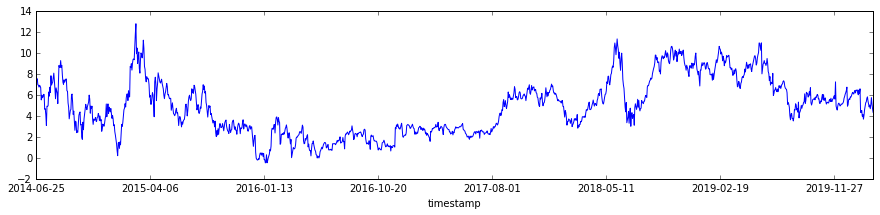

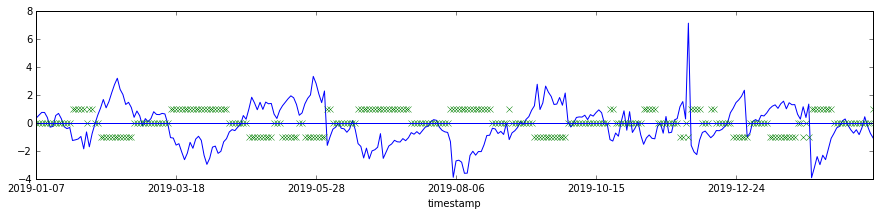

In [16]:
df_signal.spread.plot(figsize=(15,3), title =)
plt.show()
df_signal.iloc[-300:].signal.plot(figsize = (15,3))
df_rule.iloc[-300:].position.plot(figsize=(15,3), style = "x")
plt.axhline(0)

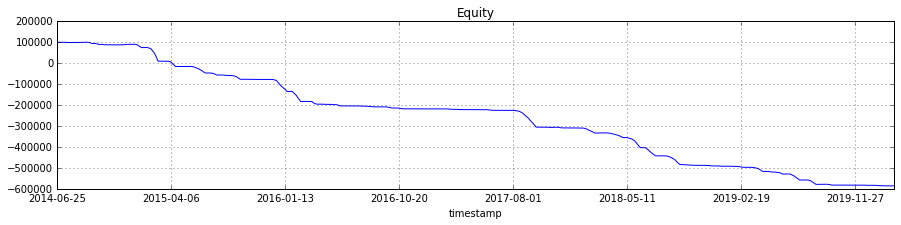

In [18]:
df_equity.equity.plot(figsize = (15,3), grid = True, title = "Equity")
# df_equity.daily_mtm.plot()